# Regression : Use case .
# Problem Statement.
- The Advertising dataset captures sales revenue generated with respect to advertising spends across multiple channels like radio,Tv and newspaper

## Objectives
- Build a linear regression model to :
- Make predictions
- Find and analyze model residuals
- Evaluate model efficiency using RMSE and R-Square values 

In [1]:
import pandas as pd     # here we are import the dataset using pandas.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Advertising.csv")
df.head()                                                                                                                                                                                                                                                                                                                                                                               

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


explanation of each feature in the dataset:

- **TV**: Amount of money spent on TV advertising.
- **Radio**: Amount of money spent on radio advertising.
- **Newspaper**: Amount of money spent on newspaper advertising.
- **Sales**: Revenue generated or units sold as a result of the advertising.

This dataset is useful for analyzing how spending on different advertising mediums affects sales, helping businesses optimize their marketing strategies.

In [2]:
df.drop(columns=['Unnamed: 0'], inplace=True)   # we decided to drop the unnamed column because this feature is not important for our project
 

In [3]:
df.head()  # now unnamed feature is removed from our dataset.

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.shape   # 200 samples  and 4 features in a dataset.

(200, 4)

In [5]:
df.info()    # no null values and all feature are float values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isnull().sum()  # no nan values in a dataset.

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
df.describe()   # staticall methods of all features.

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


- **Key Insights**
  
- Variability: TV advertising spending has the highest variability, indicating a wide range of spending amounts. Radio and newspaper advertising have moderate variability.
  
- Advertising Expenditure: The median values for TV, radio, and newspaper spending are close to their respective means, suggesting a relatively symmetrical distribution of spending.
  
- Sales Distribution: Sales figures have moderate variability, with a median close to the mean, indicating a relatively symmetrical distribution.

# all  4  feature are numerical(continues) features so we can start Eda part now .
- step: 1 = Univariate Analysis.
- step: 2 = Bivariate Analysis.
- step: 3 = Multivariate Analysis.
- step: 4 = Model building and Evaluation.

# Univariate Analysis.

In [8]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# 1.TV 
- **Insights**
- Histogram show distribution of TV expenditure is close to normally distributed.
- Mean Expenditure is $147.04.
- no outliers are present in TV feature because its almost close to normally distributed.

- **Important Note**
- No need of transfromation for regression model because its almost normally distributed around the mean.
  


In [9]:
df['TV'].describe()

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64

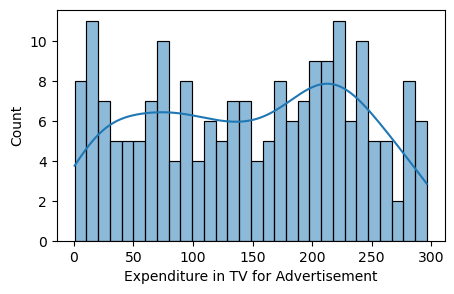

In [10]:
plt.figure(figsize=(5,3))
sns.histplot(df['TV'],kde=True,bins=30)
plt.xlabel('Expenditure in TV for Advertisement')
plt.ylabel("Count")
plt.show()

- above Histogram show distribution of TV expenditure is close to  normally distributed.

- The distribution of TV advertising expenditures appears to be somewhat uniform with multiple peaks, suggesting that expenditures vary widely with several common expenditure ranges.
  
- There are noticeable peaks around the $50, $150, and $200,$250 marks, indicating that these are common expenditure levels in the dataset.
  
- The KDE line provides a smoother view of the distribution, highlighting the density of data points and making it easier to see the underlying pattern in expenditure.

In [11]:
df['TV'].skew()   # slightlly left skeweed but close to zero.

-0.06985336213274573

In [12]:
df['TV'].kurt()  # platykurtic with lighter tail.

-1.2264948242299691

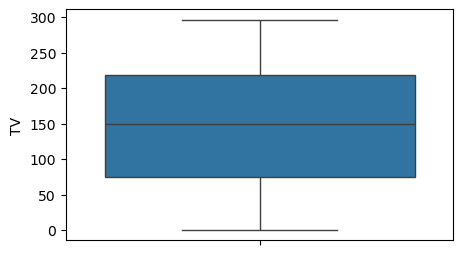

In [13]:
plt.figure(figsize=(5,3))   # no outliers are present in TV feature because its almost close to normally distributed.
sns.boxplot(df['TV'])
plt.show()

# 2.Radio

- **Insights**
-  mean expenditure of radio is $ 23.26.
-  Histogram show slightlly right skweed but close to normally distributed around the mean.
-  no outliers are present in radio feature because its almost close to normally distributed.

- **Important Note**
- No need of transfromation for regression model because its almost normally distributed around the mean.

In [14]:
df['radio'].describe()  # mean expenditure of radio is $ 23.26

count    200.000000
mean      23.264000
std       14.846809
min        0.000000
25%        9.975000
50%       22.900000
75%       36.525000
max       49.600000
Name: radio, dtype: float64

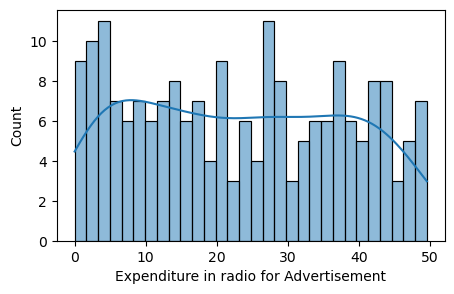

In [15]:
plt.figure(figsize=(5,3))
sns.histplot(df['radio'],kde=True,bins=30)
plt.xlabel('Expenditure in radio for Advertisement')
plt.ylabel("Count")
plt.show()

- above Histogram show slightlly right skweed but  close to normally distributed around the mean.
  

- Histogram of radio advertisement expenditure distribution.
- Most frequent expenditure range: 25-30 units.
- Distribution is right-skewed (more data points on the left).
- Kernel density estimate (KDE) overlaid for smoother visualization.

In [16]:
df['radio'].skew()  # slighttly right skeweed but close to normally distributed.

0.09417463149664404

In [17]:
df['radio'].kurt()   #  platykurtic shows lighter tails.

-1.2604014033120108

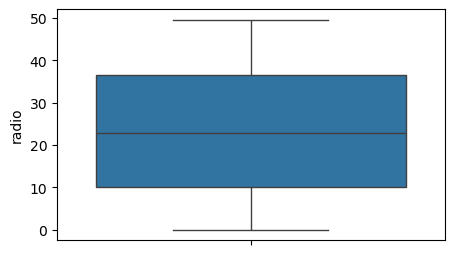

In [18]:
plt.figure(figsize=(5,3))   # no outliers are present in radio feature because its almost close to normally distributed.
sns.boxplot(df['radio'])
plt.show()

# 3.Newspaper
- **Insights**
- mean is 30 & median is 25 (mean>median)its show non - normality in distribution.
- Above Histogrm shows newspaper is right skeweed 
most of the data concentrated in left side
- outliers are present in newsapaper feature because its right skeweed  distributed..

- **Imprtant Note*
- we decided to remove outliers .
- after removing outliers skewness & kurtosis is now less than before.*

In [19]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [20]:
df['newspaper'].describe()  # mean is 30 & median is 25 (mean>median)its show non - normality in distribution.


count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: newspaper, dtype: float64

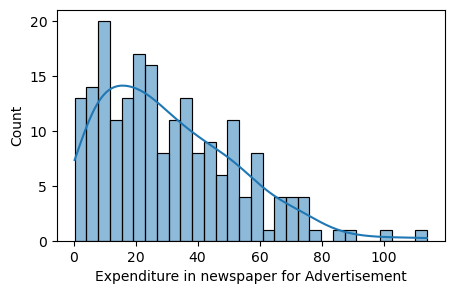

In [21]:
plt.figure(figsize=(5,3))
sns.histplot(df['newspaper'],kde=True,bins=30)
plt.xlabel('Expenditure in newspaper for Advertisement')
plt.ylabel("Count")
plt.show()

- Above Histogrm shows newspaper is  right skeweed.
- most of the data concentrated in left side.

In [22]:
df['newspaper'].skew()

0.8947204074986175

In [23]:
df['newspaper'].kurt()

0.6495019091381007

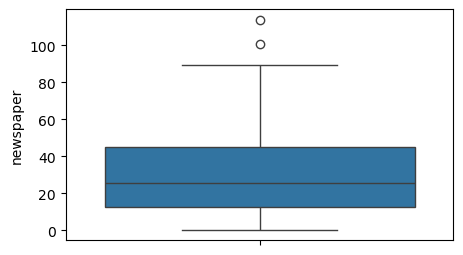

In [24]:
plt.figure(figsize=(5,3))   #  outliers are present in newsapaper feature because its right skeweed  distributed.
sns.boxplot(df['newspaper'])
plt.show()

In [25]:
# we decided to remove outliers .

Q1 = df['newspaper'].quantile(0.25)
Q3 = df['newspaper'].quantile(0.75)

IQR = Q3 - Q1

lower_bond = Q1  -1.5 * IQR
upper_bond = Q3  + 1.5 * IQR

df = df[(df['newspaper'] >= lower_bond) & (df['newspaper']<=upper_bond)]
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


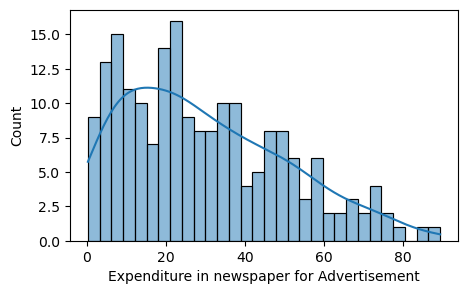

In [26]:
plt.figure(figsize=(5,3))
sns.histplot(df['newspaper'],kde=True,bins=30)
plt.xlabel('Expenditure in newspaper for Advertisement')
plt.ylabel("Count")
plt.show()

In [27]:
df['newspaper'].skew()  # after removing outliers skewness to now less than before.

0.650111551724088

In [28]:
df['newspaper'].kurt()

-0.33298368090117947

# Sales .

- **Insights**
-  mean is 13 & median Expenditure is 12 its show close to normally distribution.
- histogram shows slightlly right skeweed but close to normally distributed.
- no  outliers are present in sales feature because its close to normally distributed.

- **Important notes**

In [29]:
df['sales'].describe()  # mean is 13 & median Expenditure is 12 its show close to normally distribution.

count    198.000000
mean      13.980808
std        5.196097
min        1.600000
25%       10.325000
50%       12.900000
75%       17.375000
max       27.000000
Name: sales, dtype: float64

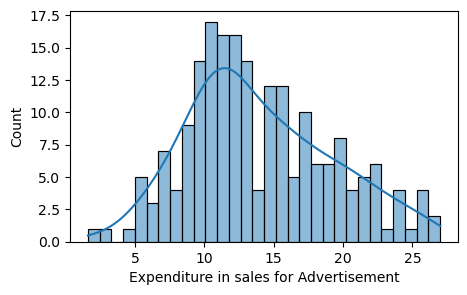

In [30]:
plt.figure(figsize=(5,3))
sns.histplot(df['sales'],kde=True,bins=30)
plt.xlabel('Expenditure in sales for Advertisement')
plt.ylabel("Count")
plt.show()

-  Above histogram shows slightlly right skeweed but close to normally distributed.


In [31]:
df['sales'].skew()  # skeweeness slightlly right skeweed but close to normally distributed.

0.4071300154120368

In [32]:
df['sales'].kurt()  # show slightlly platykurtic with thinner tail.

-0.39038261264334295

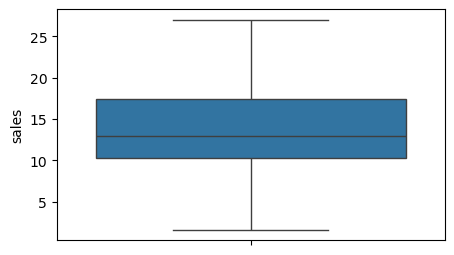

In [33]:
plt.figure(figsize=(5,3))   # no outliers are present in sales feature because its close to normally distributed.
sns.boxplot(df['sales'])
plt.show()

# Bivariate & Multivariate analysis. 
- We can find relationship between all features.

<Figure size 500x300 with 0 Axes>

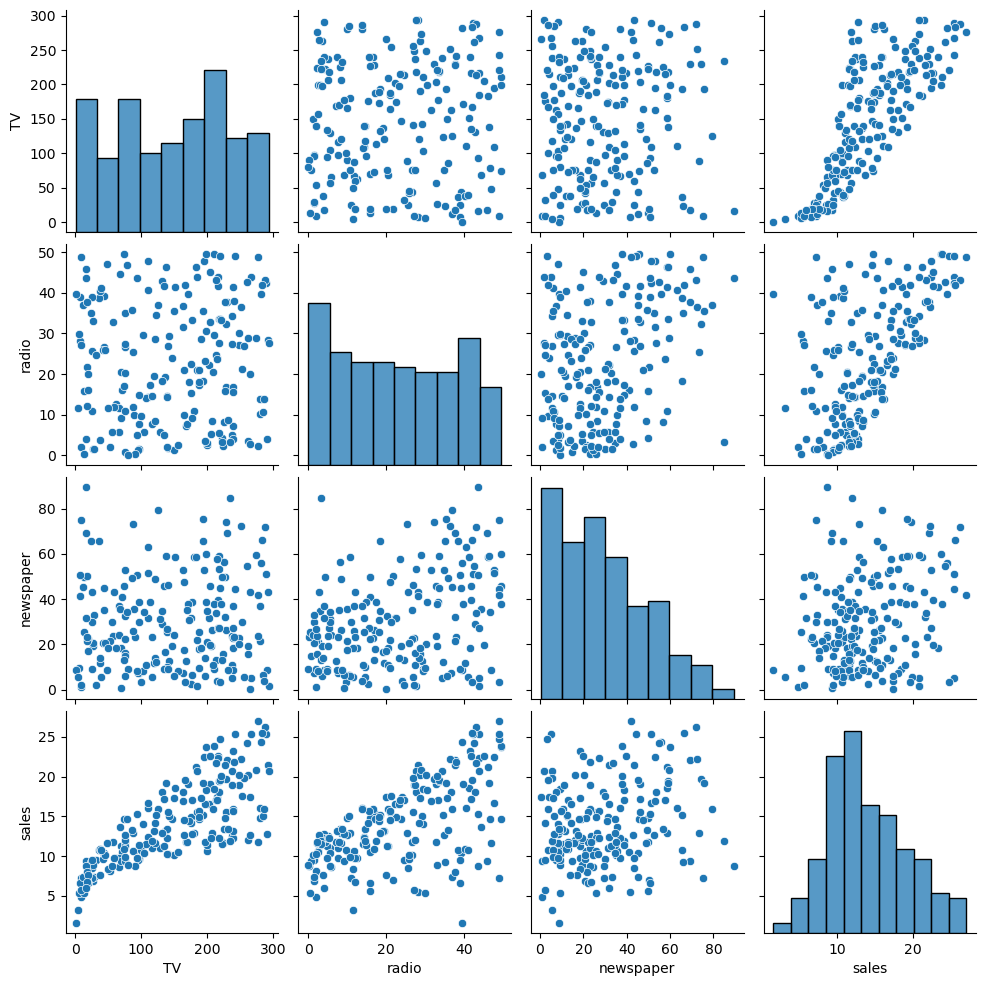

In [34]:
plt.figure(figsize=(5,3))
sns.pairplot(df)
plt.show()

**Insights**

My dependent variable is Sales and my independent variables are TV, newspaper, and radio.

* **TV and Sales:** There is a strong positive correlation between TV and Sales. This means that increasing expenditure on TV advertisements is associated with a significant increase in sales. 
* **Radio and Sales:** There is a strong positive correlation between Radio and Sales. This implies that increasing expenditure on radio advertisements is linked to a substantial increase in sales. 
* **Newspaper and Sales:** There is a slight positive correlation between newspaper and sales. This indicates that while increasing expenditure on newspaper advertisements may lead to a modest increase in sales, the effect is relatively minimal compared to TV and radio advertising. 


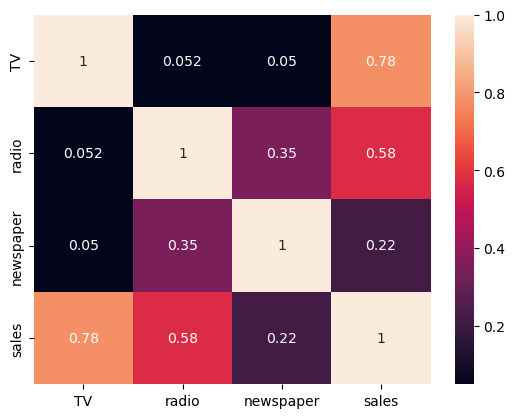

In [35]:
correlation = df.corr()
sns.heatmap(correlation,annot=True)
plt.show()

In [36]:
df.to_csv('Clean_df.csv',index=False)

In [37]:
df1=pd.read_csv('Clean_df.csv')
df1

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
193,38.2,3.7,13.8,7.6
194,94.2,4.9,8.1,9.7
195,177.0,9.3,6.4,12.8
196,283.6,42.0,66.2,25.5


# Model building.

# Model 1

In [38]:
# Import necessary libraries:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler



In [39]:
feature_cols = ['TV','radio','newspaper']
x = df[feature_cols]
y = df['sales']

In [40]:
from sklearn import model_selection as ms
xtrain,xtest,ytrain,ytest = ms.train_test_split(x,y,test_size=0.3,random_state=42)

In [41]:
scaler = StandardScaler()
scaler.fit(xtrain)

xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

In [42]:
lm = LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

# Checking the intercept and the coefficients

In [43]:
print(lm.intercept_)
print(lm.coef_)

14.126086956521739
[3.80614393 2.77845545 0.28041684]


formuls = mx+c

# Prediction

In [44]:
preds_train = lm.predict(xtrain)
preds_test = lm.predict(xtest)

# Assessing the model performance through various metrics

In [45]:
# RMSE of Train data.
print(f"RMSE for train data is : {np.sqrt(mean_squared_error(ytrain,preds_train))}")
print(f"R2 for train data is {r2_score(ytrain,preds_train)}")

# RMSE of Test.
print(f"RMSE for test data is : {np.sqrt(mean_squared_error(ytest,preds_test))}")
print(f"R2 for test data is {r2_score(ytest,preds_test)}")


RMSE for train data is : 1.6720001033743859
R2 for train data is 0.8949751177619989
RMSE for test data is : 1.7693869118689427
R2 for test data is 0.8851774936997314


In [46]:
df1.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Multiple Linear Regression using statsmodels¶

In [47]:
import statsmodels.api as sm
xtrain = sm.add_constant(xtrain)
model_result = sm.OLS(ytrain,xtrain).fit()

In [48]:
print(model_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     380.6
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           2.35e-65
Time:                        10:15:52   Log-Likelihood:                -266.75
No. Observations:                 138   AIC:                             541.5
Df Residuals:                     134   BIC:                             553.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1261      0.144     97.800      0.0

This output is from an Ordinary Least Squares (OLS) regression model. Here's a breakdown of the key points and insights:

### 1. **Model Summary:**
   - **Dependent Variable (`sales`)**: The model predicts `sales`.
   - **R-squared: 0.895**: This indicates that approximately 89.5% of the variance in `sales` is explained by the model. This is a strong fit, suggesting that the independent variables are good predictors of `sales`.
   - **Adjusted R-squared: 0.893**: This value, slightly lower than the R-squared, adjusts for the number of predictors in the model. It still indicates a strong model fit.
   - **F-statistic: 380.6**: The F-statistic tests the overall significance of the model. A high F-statistic with a very low p-value (Prob(F-statistic) = 2.35e-65) indicates that the model is statistically significant.

### 2. **Coefficients:**
   - **Intercept (`const`): 14.1261**: This is the predicted value of `sales` when all predictors are zero.
   - **x1 (3.8061)**, **x2 (2.7785)**, **x3 (0.2804)**: These coefficients represent the impact of each independent variable on `sales`.
     - **x1** has the highest coefficient, suggesting it has the strongest positive impact on `sales`.
     - **x2** also positively impacts `sales`, but less so than `x1`.
     - **x3** has a very small positive coefficient, implying a minimal impact on `sales`.
   - **P>|t|**: All predictors (`x1`, `x2`, `x3`) have p-values close to 0, indicating that they are statistically significant in predicting `sales`.

### 3. **Diagnostic Statistics:**
   - **Omnibus: 48.725** and **Prob(Omnibus): 0.000**: The Omnibus test is a test for normality. A significant result (p < 0.05) suggests that the residuals are not normally distributed.
   - **Durbin-Watson: 1.971**: This statistic tests for autocorrelation in the residuals. Values close to 2 suggest no autocorrelation.
   - **Jarque-Bera (JB): 128.383** and **Prob(JB): 1.32e-28**: Similar to the Omnibus test, these results suggest that the residuals are not normally distributed.
   - **Skew: -1.400**: This indicates the distribution of residuals is skewed to the left.
   - **Kurtosis: 6.806**: Kurtosis measures the tailedness of the distribution. A kurtosis value greater than 3 suggests a leptokurtic distribution, meaning more outliers than a normal distribution.

### **Conclusion:**
- **Model Fit**: The model appears to fit the data well, as evidenced by the high R-squared value.
- **Predictor Significance**: All predictors (x1, x2, x3) are significant in predicting `sales`.
- **Residual Diagnostics**: While the model is statistically significant and has a good fit, the non-normal distribution of residuals and the skewness indicate potential issues with the model's assumptions, particularly normality. Further investigation, such as transformations or alternative models, might be needed to address these issues.



In [49]:
# Assuming 'model' is your fitted OLS model
residuals = model_result.resid


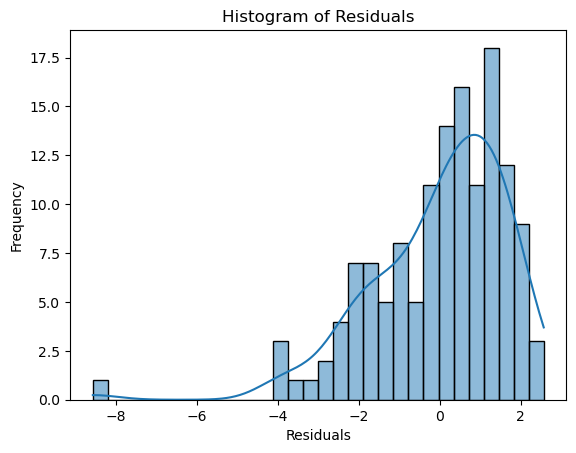

In [50]:
import seaborn as sns

# Histogram of Residuals
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


**Conclusion:**
- This histogram clearly indicates that the  model had issues with residual distribution, specifically skewness and non-normality. These issues justified the need for transformation (such as Box-Cox) to stabilize the variance and achieve a more normal distribution of residuals, leading to more reliable regression results.

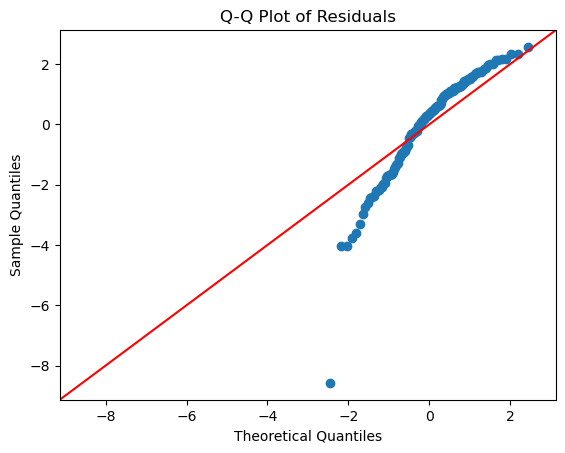

In [51]:
# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

**Conclusion:**

- Your Q-Q plot shows that the residuals from your initial model deviate from normality, with significant skewness and outliers. This is why transformations like the Box-Cox were necessary to improve the normality of residuals and, ultimately, the reliability of your regression model.

In [52]:
df1.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# 1. Data Transformation:
- Transforming our dependent and/or independent variables can help in achieving normality.

In [53]:
TV_skew=df1['TV'].skew()
print('TV_Skewness',TV_skew)

TV_Skewness -0.08233208466403653


In [54]:
radio_skew = df1['radio'].skew()
print('radio_skewenes',radio_skew)

radio_skewenes 0.11484208726730326


In [55]:
newspaper_skew = df1['newspaper'].skew()
print("newspaper skeweness",newspaper_skew)

newspaper skeweness 0.650111551724088


In [56]:
sales_skew = df1['sales'].skew()
print('sales skeweness',sales_skew)

sales skeweness 0.4071300154120368


# Sales.

In [57]:
# Box-Cox Transformation:     # best skeweness after transformation.
from scipy import stats
df1['sales_boxcox'], _ = stats.boxcox(df1['sales'])
df1['sales_boxcox'].skew()

-0.004650690259031619

In [58]:
df1.head()

,TV,radio,newspaper,sales,sales_boxcox
0,230.1,37.8,69.2,22.1,8.676703
1,44.5,39.3,45.1,10.4,4.989079
2,17.2,45.9,69.3,9.3,4.567075
3,151.5,41.3,58.5,18.5,7.656109
4,180.8,10.8,58.4,12.9,5.883804


# newspaper.


In [59]:
# Square Root Transformation:        # best skewness of newspaper after transformation.
df1['newspaper_sqrt'] = np.sqrt(df1['newspaper'])
df1['newspaper_sqrt'].skew()


-0.040649472621842535

In [60]:
df1.head()

,TV,radio,newspaper,sales,sales_boxcox,newspaper_sqrt
0,230.1,37.8,69.2,22.1,8.676703,8.318654
1,44.5,39.3,45.1,10.4,4.989079,6.715653
2,17.2,45.9,69.3,9.3,4.567075,8.324662
3,151.5,41.3,58.5,18.5,7.656109,7.648529
4,180.8,10.8,58.4,12.9,5.883804,7.641989


# Model 2:  New model after transformation.

In [61]:
feature_cols = ['TV','radio','newspaper_sqrt']
x = df1[feature_cols]
y = df1['sales_boxcox']

In [62]:
from sklearn import model_selection as ms
xtrain,xtest,ytrain,ytest = ms.train_test_split(x,y,test_size=0.3,random_state=42)

In [63]:
scaler = StandardScaler()
scaler.fit(xtrain)

xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

In [64]:
lm = LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

In [65]:
print(lm.intercept_)
print(lm.coef_)

6.157482513620732
[1.30126732 0.86789203 0.12547007]


In [66]:
# RMSE of Train data.
print(f"RMSE for train data is : {np.sqrt(mean_squared_error(ytrain,preds_train))}")
print(f"R2 for train data is {r2_score(ytrain,preds_train)}")

# RMSE of Test.
print(f"RMSE for test data is : {np.sqrt(mean_squared_error(ytest,preds_test))}")
print(f"R2 for test data is {r2_score(ytest,preds_test)}")


RMSE for train data is : 8.629906272969821
R2 for train data is -23.678737063769194
RMSE for test data is : 8.199273753505985
R2 for test data is -21.41253537400844


In [67]:
import statsmodels.api as sm
xtrain = sm.add_constant(xtrain)
model_result1 = sm.OLS(ytrain,xtrain).fit()

In [68]:
print(model_result1.summary())

                            OLS Regression Results                            
Dep. Variable:           sales_boxcox   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     320.0
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           6.93e-61
Time:                        10:15:53   Log-Likelihood:                -127.14
No. Observations:                 138   AIC:                             262.3
Df Residuals:                     134   BIC:                             274.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1575      0.053    117.239      0.0

### Insights and Conclusions from the Updated OLS Model:

#### 1. **Model Fit:**
   - **R-squared: 0.878**: After the Box-Cox transformation, the R-squared value is 0.878, indicating that approximately 87.8% of the variance in the transformed sales data (`sales_boxcox`) is explained by the model. This is slightly lower than before but still shows a strong fit.
   - **Adjusted R-squared: 0.875**: The adjusted R-squared, which accounts for the number of predictors, is also strong and close to the R-squared value, reinforcing the model’s goodness of fit.
   - **F-statistic: 320.0, Prob(F-statistic): 6.93e-61**: The high F-statistic and its very low p-value indicate that the model is statistically significant.

#### 2. **Coefficients:**
   - **Intercept (`const`): 6.1575**: The constant term has a high t-value (117.239) and a p-value of 0.000, indicating that it's significantly different from zero.
   - **x1 (1.3013)**: The coefficient for `x1` is 1.3013, with a very significant t-value (24.639) and p-value (0.000), meaning it has a strong positive impact on the transformed sales.
   - **x2 (0.8679)**: The coefficient for `x2` is 0.8679, also statistically significant, suggesting it positively influences the transformed sales, though to a lesser extent than `x1`.
   - **x3 (0.1255)**: `x3` has a smaller coefficient of 0.1255, with a t-value of 2.230 and a p-value of 0.027. This indicates a weaker but still statistically significant impact on the transformed sales.

#### 3. **Diagnostic Statistics:**
   - **Omnibus: 110.990, Prob(Omnibus): 0.000**: The Omnibus test is still significant, suggesting the residuals may still deviate from normality.
   - **Durbin-Watson: 2.111**: This value is close to 2, indicating that there is no significant autocorrelation in the residuals.
   - **Jarque-Bera (JB): 1299.689, Prob(JB): 5.97e-283**: The Jarque-Bera test is also highly significant, which further suggests non-normality in the residuals.
   - **Skew: -2.727**: The residuals are still heavily skewed to the left, even after the transformation.
   - **Kurtosis: 17.010**: The kurtosis value is much higher than 3, indicating that the residuals have heavy tails (leptokurtic distribution).

### Conclusions:

- **Improvement in Normality**: The Box-Cox transformation likely improved the linear relationship between the predictors and the dependent variable. However, the diagnostic tests (Omnibus, Jarque-Bera) indicate that non-normality still persists.
  
- **Predictor Significance**: All the predictors remain significant, with `x1` having the strongest influence on `sales_boxcox`. The significance of `x3` has improved slightly but remains the weakest among the predictors.

- **Residual Non-Normality**: Despite the transformation, the residuals still exhibit non-normality, as indicated by the skewness and kurtosis values. This suggests that other issues, such as outliers or incorrect model specification, might still be present.

### Next Steps:

- **Further Diagnostics**: 
  - You may consider applying different transformations or identifying and addressing outliers that might be causing this residual skewness.
  - Additionally, exploring a robust regression model could help handle the heavy tails in the distribution.
  
- **Alternative Models**: 
  - If residuals’ non-normality continues to be a concern, considering alternative modeling techniques like Quantile Regression or using Generalized Linear Models (GLMs) might be worthwhile.

Overall, your model has improved, but there's still room to refine it further to address residual non-normality.

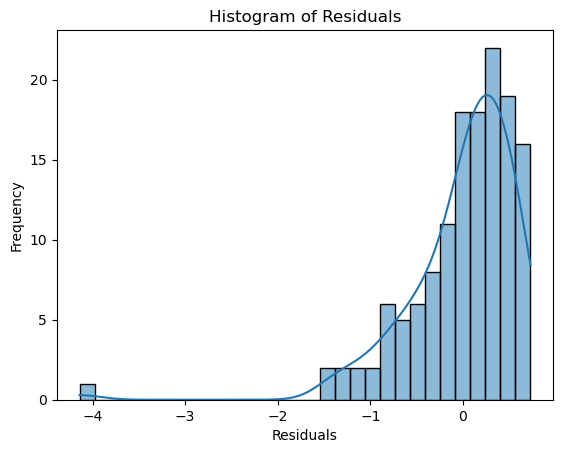

In [69]:
# Assuming 'model' is your fitted OLS model
residuals_1 = model_result1.resid

# Histogram of Residuals
sns.histplot(residuals_1, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()



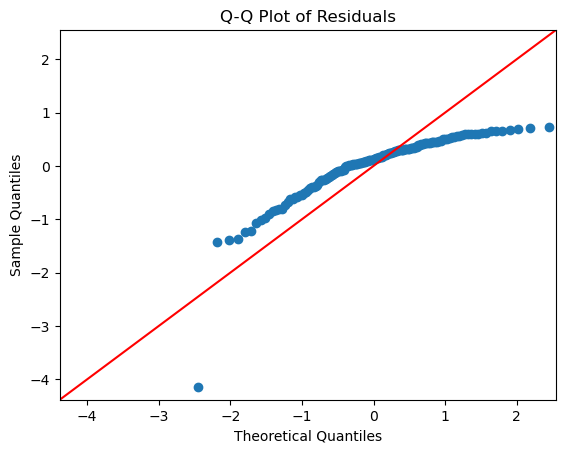

In [70]:
sm.qqplot(residuals_1, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# after transformation also residuals are not normally distributed.

- we can decided to drop the newspaper feature because there is less and no effect in a sales of newspaper.

In [83]:
df1.head()

,TV,radio,newspaper,sales,sales_boxcox,newspaper_sqrt
0,230.1,37.8,69.2,22.1,8.676703,8.318654
1,44.5,39.3,45.1,10.4,4.989079,6.715653
2,17.2,45.9,69.3,9.3,4.567075,8.324662
3,151.5,41.3,58.5,18.5,7.656109,7.648529
4,180.8,10.8,58.4,12.9,5.883804,7.641989


# Model 3 .

In [85]:
features =['TV','radio']
x = df1[features]
y= df1['sales']

In [86]:
from sklearn import model_selection as ms
xtrain,xtest,ytrain,ytest = ms.train_test_split(x,y,test_size=0.3,random_state=42)

In [87]:
scaler = StandardScaler()
scaler.fit(xtrain)

xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

In [88]:
lm = LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

In [89]:
# RMSE of Train data.
print(f"RMSE for train data is : {np.sqrt(mean_squared_error(ytrain,preds_train))}")
print(f"R2 for train data is {r2_score(ytrain,preds_train)}")

# RMSE of Test.
print(f"RMSE for test data is : {np.sqrt(mean_squared_error(ytest,preds_test))}")
print(f"R2 for test data is {r2_score(ytest,preds_test)}")


RMSE for train data is : 1.6720001033743859
R2 for train data is 0.8949751177619989
RMSE for test data is : 1.7693869118689427
R2 for test data is 0.8851774936997314


In [ ]:
residuals_2 = model_result1.resid

# Histogram of Residuals
sns.histplot(residuals_1, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [93]:
import statsmodels.api as sm
xtrain = sm.add_constant(xtrain)
model_result2 = sm.OLS(ytrain,xtrain).fit()

In [94]:
print(model_result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     560.3
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           4.23e-66
Time:                        10:27:21   Log-Likelihood:                -268.37
No. Observations:                 138   AIC:                             542.7
Df Residuals:                     135   BIC:                             551.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1261      0.146     97.017      0.0

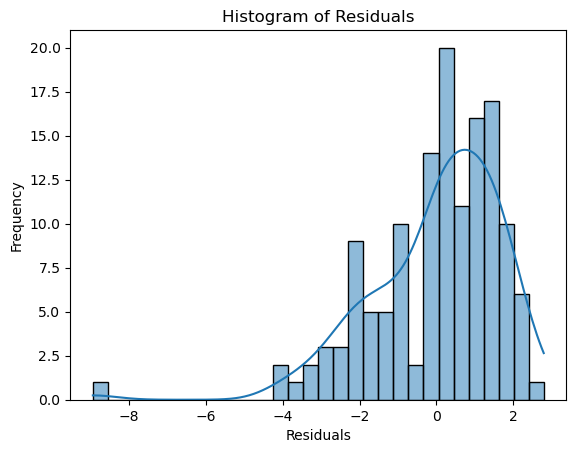

In [95]:
residuals_2 = model_result2.resid

# Histogram of Residuals
sns.histplot(residuals_2, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()



**Conclusion:**

Based on the analysis, we can conclude that Model 1 is the best performing model. This conclusion is drawn from its higher AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) values, which suggest a better fit compared to other models. Additionally, Model 1 exhibits a higher R² value and lower RMSE (Root Mean Square Error), further indicating superior performance.

However, it's important to note that the model does face challenges related to the non-normality of residuals. This issue arises primarily due to the small sample size used in the analysis. Non-normality in residuals can impact the reliability of the model's predictions.

Although we attempted feature transformation to address this issue, it did not yield the desired results. If a larger sample size were available, it could potentially mitigate the non-normality of errors, leading to more robust and reliable model performance. Therefore, future analyses should consider increasing the sample size to enhance model accuracy and reduce the impact of non-normality in residuals.

---

This version clarifies the reasoning behind the conclusions and emphasizes the impact of sample size on residual normality.

### x1 (3.8061), x2 (2.7785), x3 (0.2804): These coefficients represent the impact of each independent variable on sales.
- x1(TV) has the highest coefficient, suggesting it has the strongest positive impact on sales.
- x2(radio) also positively impacts sales, but less so than x1.
- x3(newspaper) has a very small positive coefficient, implying a minimal impact on sales.



We observe that newspaper advertising has a minimal impact on sales. Therefore, we can consider reallocating the funds currently spent on newspaper advertisements to TV and radio advertising, which are more effective in boosting sales. This strategic shift in advertising expenditure could lead to a more rapid increase in sales.

---

This version clarifies your point and enhances readability.

## Ridge Regression: Adds a penalty for large coefficients, which can help mitigate the effect of non-normality.

In [71]:
from sklearn.linear_model import Ridge

In [72]:
df1.head()

,TV,radio,newspaper,sales,sales_boxcox,newspaper_sqrt
0,230.1,37.8,69.2,22.1,8.676703,8.318654
1,44.5,39.3,45.1,10.4,4.989079,6.715653
2,17.2,45.9,69.3,9.3,4.567075,8.324662
3,151.5,41.3,58.5,18.5,7.656109,7.648529
4,180.8,10.8,58.4,12.9,5.883804,7.641989


In [73]:
features =['TV','radio']
X = df1[features]
y= df1['sales_boxcox']

In [74]:
# Example: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
# Initialize Ridge Regression model with alpha = 1.0 (default)
ridge_model = Ridge(alpha=1.0)


In [76]:
# Fit the model
ridge_model.fit(X_train, y_train)


Ridge()

In [77]:
# Make predictions.
y_pred = ridge_model.predict(X_test)


In [78]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 0.30923507922807236
R-squared: 0.8961490572709873


In [79]:
# Coefficients of the Ridge model.
print(f"Ridge Coefficients: {ridge_model.coef_}")


Ridge Coefficients: [0.01548407 0.05842848]


In [80]:
X_train = sm.add_constant(X_train)
model_result1 = sm.OLS(y_train,X_train).fit()

In [81]:
print(model_result1.summary())

                            OLS Regression Results                            
Dep. Variable:           sales_boxcox   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     554.4
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           2.35e-71
Time:                        10:15:54   Log-Likelihood:                -145.90
No. Observations:                 158   AIC:                             297.8
Df Residuals:                     155   BIC:                             307.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4860      0.121     20.614      0.0